## **Feature Aggregation FINAL PROJECT**


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUGAS/FINAL PROJECT DS - Yodha Pranata/Dataset.csv')

In [ ]:
df.sample(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
242486,22,22,76.0,95.0,36.78,92.0,68.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,4.4,NaN,NaN,NaN,NaN,28.5,NaN,NaN,NaN,75.37,1,NaN,NaN,-141.23,23,0,6586
847138,9,9,71.0,98.0,NaN,125.0,96.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.00,1,0.0,1.0,-43.73,10,0,110331
1050785,24,24,105.0,98.0,NaN,145.0,94.0,74.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.00,1,0.0,1.0,0.00,25,0,115268
349596,23,23,81.0,99.0,NaN,NaN,67.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.98,0,NaN,NaN,-40.22,24,0,14821
983271,26,26,72.5,89.0,NaN,140.5,111.0,90.5,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.00,1,NaN,NaN,-4.05,27,0,108931
803142,11,11,88.5,98.5,NaN,139.0,91.5,64.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.00,0,1.0,0.0,-49.42,12,0,108030
1463358,46,46,86.0,97.0,37.40,116.0,76.0,54.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,0,1.0,0.0,-81.96,47,0,100604
1433299,2,2,76.0,100.0,NaN,152.0,98.0,69.0,15.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.00,0,NaN,NaN,-2.38,3,0,109135
203708,18,18,82.0,97.0,NaN,94.0,78.0,68.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.22,0,1.0,0.0,-0.02,24,0,9661
1193542,2,2,58.0,97.0,NaN,126.0,80.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.00,0,0.0,1.0,-53.14,3,0,119217


In [ ]:
df.head(150)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,NaN,26.0,0.40,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.00,61.0,14.0,NaN,6.0,NaN,0.40,7.61,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.00,58.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,NaN,121.0,74.00,91.0,14.0,NaN,3.0,NaN,0.50,7.46,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,NaN,120.0,79.00,98.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

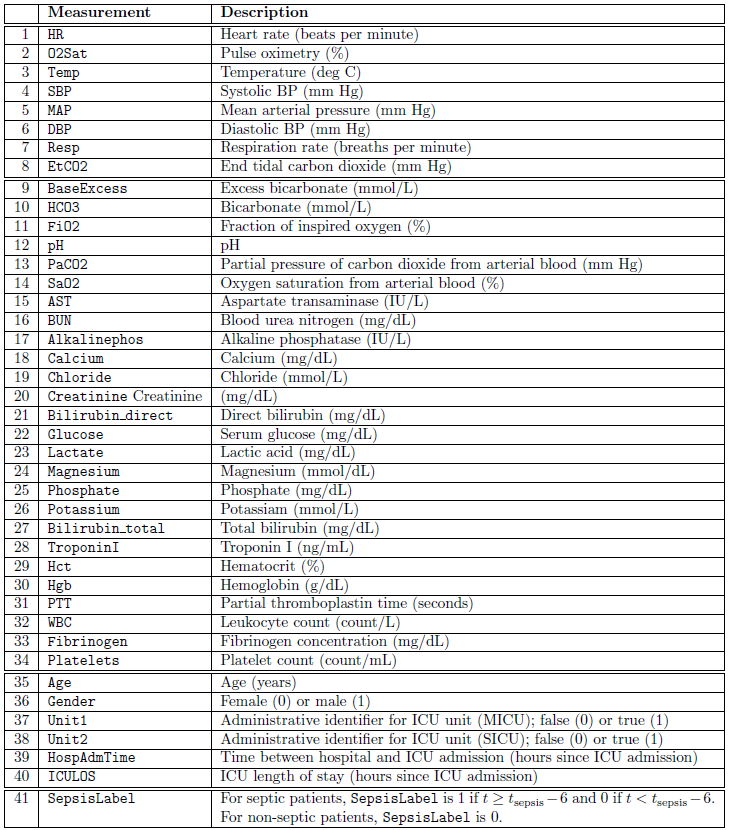

## **Feature Aggregation**

In [ ]:
#Membuat tabel target

df_label = df.groupby('Patient_ID')['SepsisLabel'].max().reset_index()
df_label.sample(5)

,Patient_ID,SepsisLabel
36296,115961,0
5341,5342,0
338,339,0
15911,15912,0
36160,115825,0


In [ ]:
# Pengambilan data 24 jam pertama untuk menilai sepsis

observation_window = 24
df_window = df[df['ICULOS'] <= observation_window]
df_window.head(5)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
# Kolom Statis (Nilainya tetap)
static_cols = ['Age', 'Gender', 'HospAdmTime', 'Unit1', 'Unit2']

# Kolom Vital Sign (Sering diukur)
vitals_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2']

# Kolom Labs (Jarang diukur)
lab_cols = [
    'BaseExcess', 'HCO3', 'pH', 'PaCO2', 'SaO2', 'BUN',
    'Creatinine', 'Glucose', 'Lactate', 'Potassium',
    'Bilirubin_total', 'Hct', 'Hgb', 'WBC', 'Platelets'
]

In [ ]:
#Pengisian Missing Value berdasarkan data pasien itu sendiri pada kolom Vitals
#Handling missing value menggunakan ffill/bfill

static_cols_to_fill = ['Unit1', 'Unit2']

# Gabungkan daftarnya
cols_to_fill = vitals_cols + static_cols_to_fill

# Loop sekarang menggunakan 'cols_to_fill'
for col in cols_to_fill:
    if col in df_window.columns:
         df_window.loc[:, col] = df_window.groupby('Patient_ID')[col].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

**1. ffill (Forward Fill)**

- ffill mengaplikasikan asumsi klinis yang paling standar dan aman, yaitu stabilitas kondisi. Kondisi fisiologis pasien (misal, SBP 80) diasumsikan tetap sama hingga ada pengukuran baru yang menggantikannya.
- Mempertahankan Insight Kritis: Ini adalah poin terpenting. Jika seorang pasien mengalami episode hipotensi (misal, SBP anjlok ke 70), dan rekaman pada jam berikutnya adalah NaN, ffill akan membawa nilai 70 tersebut ke depan.
- Tindakan ini memastikan bahwa insight mengenai kondisi kritis pasien tetap terekam dalam data. Sebaliknya, jika NaN diisi dengan nilai mean (misal 110), insight bahaya tersebut akan hilang dan data dinormalkan secara artifisial.

**2. bfill (Backward Fill)**
- bfill digunakan secara spesifik untuk menangani NaN di awal jendela observasi (misal, jam 1 atau 2). Ini mengaplikasikan rekaman valid pertama (misal, dari jam 3) ke belakang, mengisi data inisial dengan asumsi kondisi awal pasien sudah seperti itu.

In [ ]:
df_window.head(120)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,65.0,100.0,35.78,129.0,72.00,69.0,16.5,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,35.78,129.0,72.00,69.0,16.5,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,35.78,129.0,42.50,69.0,16.5,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,35.78,129.0,42.50,69.0,17.0,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,35.78,129.0,74.00,69.0,14.0,NaN,NaN,26.0,0.40,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,35.78,124.0,85.00,61.0,14.0,NaN,6.0,NaN,0.40,7.61,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,35.78,101.0,75.00,58.0,14.0,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072
8,8,8,71.0,100.0,35.78,121.0,74.00,91.0,14.0,NaN,3.0,NaN,0.50,7.46,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,9,0,17072
9,9,9,69.0,100.0,35.78,120.0,79.00,98.0,14.0,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,10,0,17072


In [ ]:
agg_funcs_vitals = ['mean', 'median', 'std', 'min', 'max']
agg_funcs_labs = ['mean', 'median', 'std', 'min', 'max', 'count']

# Buat kamus instruksi (agg_dict) dengan perulangan
agg_dict = {}

for col in static_cols:
    if col in df_window.columns:
        agg_dict[col] = 'first'

for col in vitals_cols:
    if col in df_window.columns:
        agg_dict[col] = agg_funcs_vitals

for col in lab_cols:
    if col in df_window.columns:
        agg_dict[col] = agg_funcs_labs

# JALANKAN AGREGRASI
df_agg = df_window.groupby('Patient_ID').agg(agg_dict)

# Ratakan Nama Kolom
# Mengubah dari ('HR', 'mean') -> 'HR_mean'
df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]

# Tambahkan Fitur 'ICULOS_max' (Sangat Penting)
# Ini menangkap berapa jam data yang dimiliki pasien (misal, 19 jam vs 24 jam)
df_agg['ICULOS_max'] = df_window.groupby('Patient_ID')['ICULOS'].max()

df_agg.reset_index(inplace=True)

In [ ]:
df_agg.head(20)

,Patient_ID,Age_first,Gender_first,HospAdmTime_first,Unit1_first,Unit2_first,HR_mean,HR_median,HR_std,HR_min,HR_max,O2Sat_mean,O2Sat_median,O2Sat_std,O2Sat_min,O2Sat_max,Temp_mean,Temp_median,Temp_std,Temp_min,Temp_max,SBP_mean,SBP_median,SBP_std,SBP_min,SBP_max,MAP_mean,MAP_median,MAP_std,MAP_min,MAP_max,DBP_mean,DBP_median,DBP_std,DBP_min,DBP_max,Resp_mean,Resp_median,Resp_std,Resp_min,Resp_max,FiO2_mean,FiO2_median,FiO2_std,FiO2_min,FiO2_max,BaseExcess_mean,BaseExcess_median,BaseExcess_std,BaseExcess_min,BaseExcess_max,BaseExcess_count,HCO3_mean,HCO3_median,HCO3_std,HCO3_min,HCO3_max,HCO3_count,pH_mean,pH_median,pH_std,pH_min,pH_max,pH_count,PaCO2_mean,PaCO2_median,PaCO2_std,PaCO2_min,PaCO2_max,PaCO2_count,SaO2_mean,SaO2_median,SaO2_std,SaO2_min,SaO2_max,SaO2_count,BUN_mean,BUN_median,BUN_std,BUN_min,BUN_max,BUN_count,Creatinine_mean,Creatinine_median,Creatinine_std,Creatinine_min,Creatinine_max,Creatinine_count,Glucose_mean,Glucose_median,Glucose_std,Glucose_min,Glucose_max,Glucose_count,Lactate_mean,Lactate_median,Lactate_std,Lactate_min,Lactate_max,Lactate_count,Potassium_mean,Potassium_median,Potassium_std,Potassium_min,Potassium_max,Potassium_count,Bilirubin_total_mean,Bilirubin_total_median,Bilirubin_total_std,Bilirubin_total_min,Bilirubin_total_max,Bilirubin_total_count,Hct_mean,Hct_median,Hct_std,Hct_min,Hct_max,Hct_count,Hgb_mean,Hgb_median,Hgb_std,Hgb_min,Hgb_max,Hgb_count,WBC_mean,WBC_median,WBC_std,WBC_min,WBC_max,WBC_count,Platelets_mean,Platelets_median,Platelets_std,Platelets_min,Platelets_max,Platelets_count,ICULOS_max
0,1,83.14,0,-0.03,NaN,NaN,103.000000,104.00,5.778521,89.0,113.0,91.750000,91.50,2.781929,85.0,99.0,36.595833,36.560,0.469819,36.11,37.17,126.583333,132.000,13.758528,93.0,147.0,86.527083,86.67,7.128399,75.33,96.67,NaN,NaN,NaN,NaN,NaN,25.104167,25.50,4.378751,17.0,32.0,0.280000,0.28,0.000000,0.28,0.28,22.000000,22.0,1.825742,20.0,24.0,4,45.000000,45.0,NaN,45.0,45.0,1,7.367500,7.365,0.025000,7.34,7.40,4,93.000000,93.0,6.218253,86.0,100.0,4,85.666667,88.0,6.806859,78.0,91.0,3,14.000000,14.0,NaN,14.0,14.0,1,0.700000,0.70,NaN,0.7,0.7,1,193.000000,193.0,NaN,193.0,193.0,1,NaN,NaN,NaN,NaN,NaN,0,3.800000,3.80,NaN,3.8,3.8,1,0.30,0.30,NaN,0.3,0.3,1,37.200000,37.20,NaN,37.2,37.2,1,12.500000,12.50,NaN,12.5,12.5,1,5.700000,5.70,NaN,5.7,5.7,1,317.000000,317.0,NaN,317.0,317.0,1,24
1,2,75.91,0,-98.60,0.0,1.0,60.956522,60.00,7.957148,54.0,94.0,97.086957,97.00,2.130152,94.0,100.0,36.181739,36.110,0.154174,36.00,36.44,129.173913,124.000,19.267618,114.0,194.0,66.630435,65.00,14.386087,50.50,116.00,41.565217,41.0,6.801244,36.0,66.0,14.608696,13.00,4.311603,9.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,22.000000,22.0,NaN,22.0,22.0,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,100.000000,100.0,NaN,100.0,100.0,1,2.500000,2.50,NaN,2.5,2.5,1,78.000000,78.0,NaN,78.0,78.0,1,NaN,NaN,NaN,NaN,NaN,0,5.100000,5.10,NaN,5.1,5.1,1,NaN,NaN,NaN,NaN,NaN,0,27.800000,27.80,NaN,27.8,27.8,1,9.700000,9.70,NaN,9.7,9.7,1,11.000000,11.00,NaN,11.0,11.0,1,158.000000,158.0,NaN,158.0,158.0,1,23
2,3,45.82,0,-1195.71,1.0,0.0,82.750000,83.00,6.817497,68.0,93.0,95.583333,95.75,1.290994,93.0,98.0,37.563333,37.280,0.598089,37.06,38.61,138.625000,138.000,8.786415,122.0,155.0,77.728750,77.50,7.581409,62.67,93.50,51.833333,50.5,4.020779,44.0,62.5,26.125000,26.00,5.320694,17.0,40.0,0.658333,0.70,0.147196,0.50,0.80,8.000000,8.0,NaN,8.0,8.0,1,31.500000,31.5,0.707107,31.0,32.0,2,7.510000,7.510,NaN,7.51,7.51,1,41.000000,41.0,NaN,41.0,41.0,1,NaN,NaN,NaN,NaN,NaN,0,30.500000,30.5,0.707107,30.0,31.0,2,0.900000,0.90,0.000000,0.9,0.9,2,82.000000,82.0,43.840620,51.0,113.0,2,NaN,NaN,NaN,NaN,NaN,0,3.800000,3.80,0.000000,3.8,3.8,2,NaN,NaN,NaN,NaN,NaN,0,26.550000,26.55,0.494975,26.2,26.9,2,8.950000,8.95,0.212132,8.8,9.1,2,9.150000,9.15,1.202082,8.3,10.0,2,476.500000,476.5,16.263456,465.0,488.0,2,24
3,4,65.71,0,-8.77,0.0,1.0,101.312500,102.75,5.935912,93.0,113.0,98.104167,98.00,1.539192,95.5,100.0,36.418750,36.390,0.249979,36.06,36.78,111.7916

In [ ]:
df_agg.info(max_cols=150, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40321 entries, 0 to 40320
Data columns (total 137 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    Patient_ID              40321 non-null  int64  
 1    Age_first               40321 non-null  float64
 2    Gender_first            40321 non-null  int64  
 3    HospAdmTime_first       40320 non-null  float64
 4    Unit1_first             24711 non-null  float64
 5    Unit2_first             24711 non-null  float64
 6    HR_mean                 40316 non-null  float64
 7    HR_median               40316 non-null  float64
 8    HR_std                  40315 non-null  float64
 9    HR_min                  40316 non-null  float64
 10   HR_max                  40316 non-null  float64
 11   O2Sat_mean              40296 non-null  float64
 12   O2Sat_median            40296 non-null  float64
 13   O2Sat_std               40295 non-null  float64
 14   O2Sat_min           

In [ ]:
#menggabungkan dengan df_label

final_df = pd.merge(df_agg, df_label, on='Patient_ID')

In [ ]:
#save menjadi csv final_df

final_df.to_csv('final_df_sepsis.csv', index=False)